In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cvxpy as cp

In [2]:
v=np.random.rand(2,20)
A=cp.Variable((2, 2), PSD=True)
b=cp.Variable((2,1))

In [3]:
constraints=[]
for i in range(0,20):
    constraints.append(cp.norm(A*np.asmatrix(v[:,i]).transpose()-b)<=1)

In [4]:
objective= -cp.log_det(A)
problem= cp.Problem(cp.Minimize(objective),constraints)
problem.solve(solver=cp.MOSEK)

-1.1994507961272718

In [5]:
print("The optimal objective value is",problem.value)
print("The value of A is",A.value)  
print("The value of b is",b.value)

The optimal objective value is -1.1994507961272718
The value of A is [[ 1.83499141 -0.05546489]
 [-0.05546489  1.81001957]]
The value of b is [[0.81903457]
 [0.81567856]]


In [6]:
A_sol = A.value
b_sol = b.value

Q =np.dot(A_sol.transpose(), A_sol)
c = np.dot(np.linalg.inv(A_sol), b_sol)

In [7]:
#calculating parameters of the ellipse
D, U = np.linalg.eig(Q)
ra = 1 / np.sqrt(D[0])
rb = 1 / np.sqrt(D[1])
ang = np.arctan(U[1, 0] / U[0, 0])

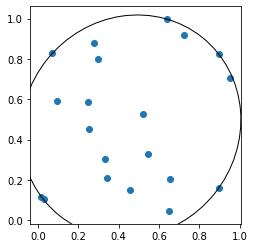

In [8]:
#plotting the ellipse
ells=patches.Ellipse(c, 2 * ra, 2 * rb, np.rad2deg(ang), fill=False)
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.scatter(v[0, :], v[1, :])
ax.add_artist(ells)
ax.axis('scaled')
plt.show()